In [3]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

intake = pd.read_csv('aac_intakes.csv')
intakes_outcomes = pd.read_csv('aac_intakes_outcomes.csv')
outcomes = pd.read_csv('aac_outcomes.csv')

1) Is there an area where more pets are found?

In [6]:
intake.value_counts('found_location').head(5)

found_location
Austin (TX)                          14443
Outside Jurisdiction                   948
Travis (TX)                            921
7201 Levander Loop in Austin (TX)      517
Del Valle (TX)                         411
dtype: int64

QUESTION 02: What is the average number of pets found in a month in the year 2015? Are there months where there is a higher number of animals found?

In [7]:
intake['datetime'] = pd.to_datetime(intake['datetime'])

In [17]:
intake_15 = intake[(intake['datetime'] >= datetime.datetime(2015,1,1)) & (intake['datetime'] < datetime.datetime(2016,1,1))]
number_pets_month = (len(intake_15) / 12).__round__()
number_pets_month

1559

In [16]:
intake_15

,age_upon_intake,animal_id,animal_type,breed,color,datetime,datetime2,found_location,intake_condition,intake_type,name,sex_upon_intake
0,8 years,A706918,Dog,English Springer Spaniel,White/Liver,2015-07-05 12:59:00,2015-07-05T12:59:00.000,9409 Bluegrass Dr in Austin (TX),Normal,Stray,Belle,Spayed Female
5,2 years,A708452,Dog,Labrador Retriever Mix,Black/White,2015-07-30 14:37:00,2015-07-30T14:37:00.000,Austin (TX),Normal,Public Assist,Mumble,Intact Male
8,5 months,A707375,Dog,Pit Bull,Brown/White,2015-07-11 18:19:00,2015-07-11T18:19:00.000,Galilee Court And Damita Jo Dr in Manor (TX),Normal,Stray,*Candy Cane,Intact Female
9,2 years,A696408,Dog,Chihuahua Shorthair,Tricolor,2015-02-04 12:58:00,2015-02-04T12:58:00.000,9705 Thaxton in Austin (TX),Normal,Stray,*Pearl,Intact Female
12,4 weeks,A707658,Cat,Domestic Shorthair Mix,Black/White,2015-07-15 17:43:00,2015-07-15T17:43:00.000,6118 Fairway in Austin (TX),Normal,Stray,*Mint,Intact Female
...,...,...,...,...,...,...,...,...,...,...,...,...
79451,3 weeks,A710038,Cat,Domestic Shorthair Mix,Black/White,2015-08-16 12:37:00,2015-08-16T12:37:00.000,E Mlk Blvd And Elmira Rd in Austin (TX),Normal,Stray,NaN,Intact Female
79572,1 year,A705821,Dog,Blue Lacy,Brown/Tan,2015-06-21 17:00:00,2015-06-21T17:00:00.000,W 45Th St And Guadalupe St in Austin (TX),Normal,Stray,Theo,Intact Male
79766,6 years,A716252,Dog,Labrador Retriever Mix,Black,2015-11-17 13:14:00,2015-11-17T13:14:00.000,10325 1625 Rd in Travis (TX),Normal,Stray,Karmen,Intact Female
79951,1 month,A705614,Cat,Domestic Longhair Mix,Blue Tabby,2015-06-19 16:31:00,2015-06-19T16:31:00.000,8023 Coulver Rd in Austin (TX),Normal,Stray,Blue,Intact Male


In [18]:
intake_january = intake_15[intake_15['datetime'] <= datetime.datetime(2015,2,1)]
intake_february = intake_15[intake_15['datetime'] < datetime.datetime(2015,3,1)]
intake_march = intake_15[intake_15['datetime'] < datetime.datetime(2015,4,1)]
intake_april = intake_15[intake_15['datetime'] < datetime.datetime(2015,5,1)]
intake_may = intake_15[intake_15['datetime'] < datetime.datetime(2015,6,1)]
intake_june = intake_15[intake_15['datetime'] < datetime.datetime(2015,7,1)]
intake_july = intake_15[intake_15['datetime'] < datetime.datetime(2015,8,1)]
intake_august = intake_15[intake_15['datetime'] < datetime.datetime(2015,9,1)]
intake_september = intake_15[intake_15['datetime'] < datetime.datetime(2015,10,1)]
intake_october = intake_15[intake_15['datetime'] < datetime.datetime(2015,11,1)]
intake_november = intake_15[intake_15['datetime'] < datetime.datetime(2015,12,1)]
intake_december = intake_15[intake_15['datetime'] > datetime.datetime(2015,12,1)]
lanimals_month = [len(intake_january),len(intake_february), len(intake_march), len(intake_april), len(intake_may),
                  len(intake_june), len(intake_july), len(intake_august), len(intake_september),
                  len(intake_october), len(intake_november), len(intake_december)]
kaniamls_month = {'January': lanimals_month[0], 'February': lanimals_month[1], 'March': lanimals_month[2],
                  'April': lanimals_month[3], 'May': lanimals_month[4], 'June': lanimals_month[5],
                  'July': lanimals_month[6], 'August': lanimals_month[7], 'September': lanimals_month[8],
                  'October':lanimals_month[9], 'November': lanimals_month[10], 'December':lanimals_month[11]}
higher_months = {}
for k, v in kaniamls_month.items():
    if v > number_pets_month:
        higher_months[k] = v
    else:
        continue
higher_months

{'February': 2317,
 'March': 3663,
 'April': 5206,
 'May': 7300,
 'June': 9489,
 'July': 11124,
 'August': 12842,
 'September': 14433,
 'October': 16173,
 'November': 17584}

QUESTION 03: ratio = incoming_pets/adopted_pets

In [262]:
incoming_pets = len(intake)
adopted_pets = len(outcomes)
ratio = incoming_pets/adopted_pets
ratio.__round__(3)

0.994

QUESTION 04: What is the distribution of the types of animals in the shelter?

Most phenomena in the real world are truly random. The normal distribution reflects this.

NORMAL DISTRIBUTION: The arguments for the normal distribution are:
    loc: Is the mean
    scale: Is the square root of the variance, i.e. the standard deviation
    size: Is the sample size or the number of trials.

In [37]:
type_animals = intake['animal_type'].unique()
type_animals

array(['Dog', 'Cat', 'Other', 'Bird', 'Livestock'], dtype=object)

So we have 5 different options... I am going to divide the data in 20 lots (5% of the total each). And I am going to get the NORMAL DISTRIBUTION of each animal.

DOGs' DISTRIBUTION

In [298]:
total_dogs = len(intake[intake['animal_type']=='Dog'])
dogs_mean = total_dogs / len(intake)
samples_per_lot = int(len(intake) / 20)
lots = []
x = 0
y = samples_per_lot
while len(lots) < 20:
    lots.append(intake[x:y])
    x = y
    y += samples_per_lot
lot01 = lots[0]
lot02 = lots[1]
lot03 = lots[2]
lot04 = lots[3]
lot05 = lots[4]
lot06 = lots[5]
lot07 = lots[6]
lot08 = lots[7]
lot09 = lots[8]
lot10 = lots[9]
lot11 = lots[10]
lot12 = lots[11]
lot13 = lots[12]
lot14 = lots[13]
lot15 = lots[14]
lot16 = lots[15]
lot17 = lots[16]
lot18 = lots[17]
lot19 = lots[18]
lot20 = lots[19]


,age_upon_intake,animal_id,animal_type,breed,color,datetime,datetime2,found_location,intake_condition,intake_type,name,sex_upon_intake
80175,1 month,A763562,Dog,Chihuahua Shorthair Mix,Cream,2017-12-11 11:04:00,2017-12-11T11:04:00.000,Austin (TX),Normal,Owner Surrender,Kuzkoo,Intact Male
80176,5 months,A763562,Dog,Chihuahua Shorthair Mix,Cream,2018-03-17 14:59:00,2018-03-17T14:59:00.000,Austin (TX),Normal,Owner Surrender,Kuzkoo,Neutered Male
80177,4 years,A701265,Dog,Pit Bull Mix,Blue/White,2018-03-29 17:45:00,2018-03-29T17:45:00.000,Travis (TX),Normal,Stray,Blue,Neutered Male
80178,4 years,A722721,Cat,Domestic Shorthair Mix,Black,2018-03-29 17:54:00,2018-03-29T17:54:00.000,1601 Royal Crest Drive in Austin (TX),Normal,Stray,NaN,Spayed Female
80179,2 years,A769046,Dog,Chihuahua Shorthair Mix,Brown Brindle,2018-03-29 13:24:00,2018-03-29T13:24:00.000,Austin (TX),Sick,Owner Surrender,*Charm,Spayed Female


In [304]:
dogs_lot01_mean = len(lot01[lot01['animal_type']=='Dog']) / len(lot01)
dogs_lot02_mean = len(lot02[lot02['animal_type']=='Dog']) / len(lot02)
dogs_lot03_mean = len(lot03[lot03['animal_type']=='Dog']) / len(lot03)
dogs_lot04_mean = len(lot04[lot04['animal_type']=='Dog']) / len(lot04)
dogs_lot05_mean = len(lot05[lot05['animal_type']=='Dog']) / len(lot05)
dogs_lot06_mean = len(lot06[lot06['animal_type']=='Dog']) / len(lot06)
dogs_lot07_mean = len(lot07[lot07['animal_type']=='Dog']) / len(lot07)
dogs_lot08_mean = len(lot08[lot08['animal_type']=='Dog']) / len(lot08)
dogs_lot09_mean = len(lot09[lot09['animal_type']=='Dog']) / len(lot09)
dogs_lot10_mean = len(lot10[lot10['animal_type']=='Dog']) / len(lot10)
dogs_lot11_mean = len(lot11[lot11['animal_type']=='Dog']) / len(lot11)
dogs_lot12_mean = len(lot12[lot12['animal_type']=='Dog']) / len(lot12)
dogs_lot13_mean = len(lot13[lot13['animal_type']=='Dog']) / len(lot13)
dogs_lot14_mean = len(lot14[lot14['animal_type']=='Dog']) / len(lot14)
dogs_lot15_mean = len(lot15[lot15['animal_type']=='Dog']) / len(lot15)
dogs_lot16_mean = len(lot16[lot16['animal_type']=='Dog']) / len(lot16)
dogs_lot17_mean = len(lot17[lot17['animal_type']=='Dog']) / len(lot17)
dogs_lot18_mean = len(lot18[lot18['animal_type']=='Dog']) / len(lot18)
dogs_lot19_mean = len(lot19[lot19['animal_type']=='Dog']) / len(lot19)
dogs_lot20_mean = len(lot20[lot20['animal_type']=='Dog']) / len(lot20)
dogs_lots_means = [dogs_lot01_mean, dogs_lot02_mean, dogs_lot03_mean, dogs_lot04_mean, dogs_lot05_mean, dogs_lot06_mean,
                   dogs_lot07_mean, dogs_lot08_mean, dogs_lot09_mean, dogs_lot10_mean, dogs_lot11_mean, dogs_lot12_mean,
                   dogs_lot13_mean, dogs_lot14_mean, dogs_lot15_mean, dogs_lot16_mean, dogs_lot17_mean, dogs_lot18_mean,
                   dogs_lot19_mean, dogs_lot20_mean]

[0.5709653280119731,
 0.5712147667747568,
 0.5582439511100025,
 0.5727113993514592,
 0.5652282364679471,
 0.5649787977051633,
 0.568221501621352,
 0.55874282863557,
 0.595659765527563,
 0.5689698179097031,
 0.5632327263656772,
 0.5617360937889748,
 0.5744574706909453,
 0.5654776752307309,
 0.5769518583187827,
 0.5637316038912447,
 0.586181092541781,
 0.5627338488401098,
 0.5754552257420803,
 0.5839361436767274]

In [316]:
ponderation = 1/20
var_list = []
for pm in dogs_lots_means:
    delta = (pm - dogs_mean)**2
    var_list.append(delta)
var_array = np.sum(var_list)*ponderation
standard_deviation = np.sqrt(var_array)

0.009386299886242162

(array([1.5000e+01, 3.2200e+02, 3.4820e+03, 1.4819e+04, 2.8198e+04,
        2.3263e+04, 8.6650e+03, 1.3290e+03, 9.1000e+01, 3.0000e+00]),
 array([0.52841909, 0.53722094, 0.5460228 , 0.55482465, 0.5636265 ,
        0.57242835, 0.58123021, 0.59003206, 0.59883391, 0.60763576,
        0.61643762]),
 <BarContainer object of 10 artists>)

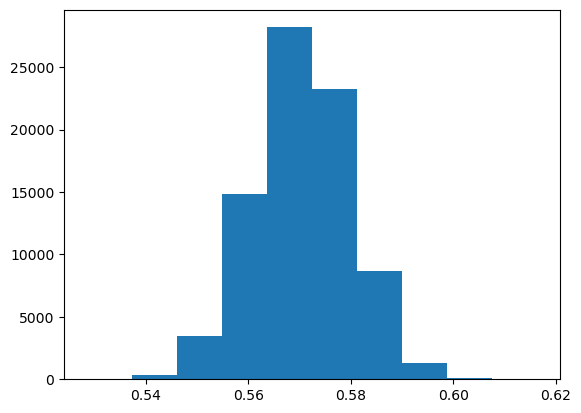

In [317]:
arrdog = np.random.normal(loc=dogs_mean, scale=standard_deviation, size=(len(intake)))
plt.hist(arrdog)

CAT'S DISTRIBUTION

In [318]:
total_cats = len(intake[intake['animal_type']=='Cat'])
cat_mean = total_cats / len(intake)

0.36987292204472044

In [319]:
cats_lot01_mean = len(lot01[lot01['animal_type']=='Cat']) / len(lot01)
cats_lot02_mean = len(lot02[lot02['animal_type']=='Cat']) / len(lot02)
cats_lot03_mean = len(lot03[lot03['animal_type']=='Cat']) / len(lot03)
cats_lot04_mean = len(lot04[lot04['animal_type']=='Cat']) / len(lot04)
cats_lot05_mean = len(lot05[lot05['animal_type']=='Cat']) / len(lot05)
cats_lot06_mean = len(lot06[lot06['animal_type']=='Cat']) / len(lot06)
cats_lot07_mean = len(lot07[lot07['animal_type']=='Cat']) / len(lot07)
cats_lot08_mean = len(lot08[lot08['animal_type']=='Cat']) / len(lot08)
cats_lot09_mean = len(lot09[lot09['animal_type']=='Cat']) / len(lot09)
cats_lot10_mean = len(lot10[lot10['animal_type']=='Cat']) / len(lot10)
cats_lot11_mean = len(lot11[lot11['animal_type']=='Cat']) / len(lot11)
cats_lot12_mean = len(lot12[lot12['animal_type']=='Cat']) / len(lot12)
cats_lot13_mean = len(lot13[lot13['animal_type']=='Cat']) / len(lot13)
cats_lot14_mean = len(lot14[lot14['animal_type']=='Cat']) / len(lot14)
cats_lot15_mean = len(lot15[lot15['animal_type']=='Cat']) / len(lot15)
cats_lot16_mean = len(lot16[lot16['animal_type']=='Cat']) / len(lot16)
cats_lot17_mean = len(lot17[lot17['animal_type']=='Cat']) / len(lot17)
cats_lot18_mean = len(lot18[lot18['animal_type']=='Cat']) / len(lot18)
cats_lot19_mean = len(lot19[lot19['animal_type']=='Cat']) / len(lot19)
cats_lot20_mean = len(lot20[lot20['animal_type']=='Cat']) / len(lot20)
cats_lots_means = [cats_lot01_mean, cats_lot02_mean, cats_lot03_mean, cats_lot04_mean, cats_lot05_mean, cats_lot06_mean,
                   cats_lot07_mean, cats_lot08_mean, cats_lot09_mean, cats_lot10_mean, cats_lot11_mean, cats_lot12_mean,
                   cats_lot13_mean, cats_lot14_mean, cats_lot15_mean, cats_lot16_mean, cats_lot17_mean, cats_lot18_mean,
                   cats_lot19_mean, cats_lot20_mean]

[0.36717385881766024,
 0.372162634073335,
 0.37665253180344227,
 0.3696682464454976,
 0.3744075829383886,
 0.3714143177849838,
 0.3751558992267398,
 0.38463457221252184,
 0.3497131454227987,
 0.3676727363432277,
 0.3791469194312796,
 0.3788974806684959,
 0.3711648790222,
 0.3726615115989025,
 0.3611873285108506,
 0.3719131953105513,
 0.35819406335744575,
 0.37789972561736096,
 0.36642554252930903,
 0.35195809428785235]

In [321]:
var_list_cats = []
for pm in cats_lots_means:
    delta = (pm - cat_mean)**2
    var_list_cats.append(delta)
var_array_cats = np.sum(var_list_cats)*ponderation
standard_deviation_cats = np.sqrt(var_array)
standard_deviation_cats

0.009386299886242162

(array([1.9000e+01, 5.4300e+02, 4.6360e+03, 1.8030e+04, 2.9155e+04,
        2.0739e+04, 6.1900e+03, 8.1800e+02, 5.5000e+01, 2.0000e+00]),
 array([0.32881927, 0.33776799, 0.34671672, 0.35566544, 0.36461416,
        0.37356288, 0.38251161, 0.39146033, 0.40040905, 0.40935777,
        0.4183065 ]),
 <BarContainer object of 10 artists>)

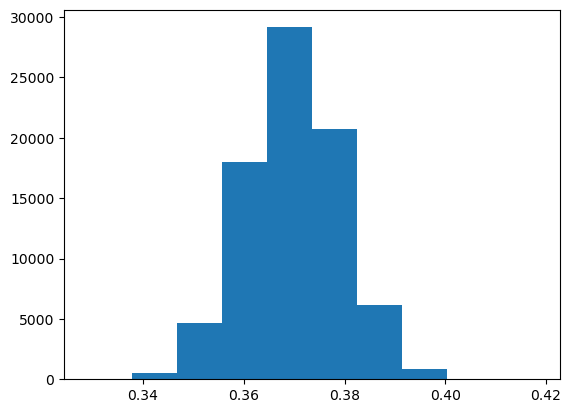

In [322]:
arrcat = np.random.normal(loc=cat_mean, scale=standard_deviation_cats, size=(len(intake)))
plt.hist(arrcat)

BIRD'S DISTRIBUTION